## **Simple Moving Average Crossover SMA- Buy / Sell Signals**
---
Conditions:
*   https://www.investopedia.com/terms/s/sma.asp
*   SMA for 20 and 50 days for Apple stocks from 01.11.2018

### 1. Libraries

In [26]:
#Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 2. Download the data from yahoofinance or CSV file

In [27]:
# a) Load the data from csv file
#from google.colab import files
#files.upload()

In [28]:
# b) Load the data from yahoofinance
df = yf.download('AAPL', start= '2018-11-01')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2018-10-31,54.220001,55.112499,54.154999,54.715000,52.931393,153435600,2018-10-31
2018-11-01,54.762501,55.590000,54.202499,55.555000,53.744015,233292800,2018-11-01
2018-11-02,52.387501,53.412498,51.357498,51.869999,50.179131,365314800,2018-11-02
2018-11-05,51.075001,51.097500,49.542500,50.397499,48.754639,264654800,2018-11-05
2018-11-06,50.480000,51.180000,50.422501,50.942501,49.281872,127531600,2018-11-06


### 3. Simple Moving Average - SMA


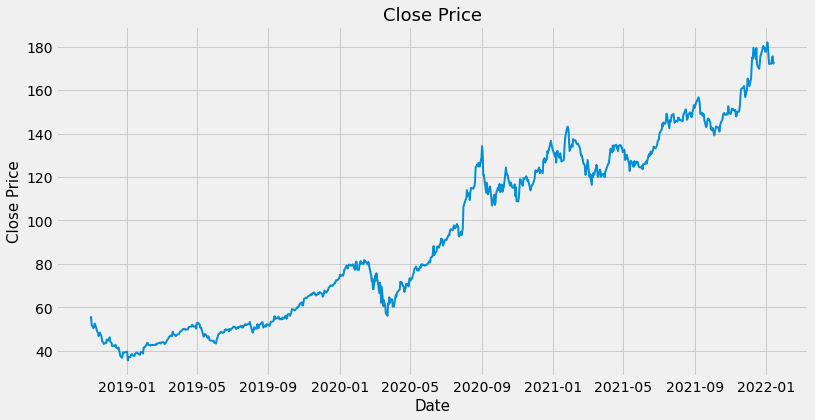

In [29]:
#Visually show and plot the close price
plt.figure(figsize=(12,6))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.show()

In [30]:
#Create a function to calculate the SMA
def SMA(data, period = 30, column='Close'):
  return data[column].rolling(window=period).mean()

In [31]:
#Create two new columns to store the 20 day and 50 day SMA
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

In [32]:
#Get the buy and sell signals
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
# Signal = 1 - Buy signal
# Signal = 0
# Signal = -1 - Sell signal
df['Position'] = df['Signal'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Close'], np. NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Close'], np. NAN)

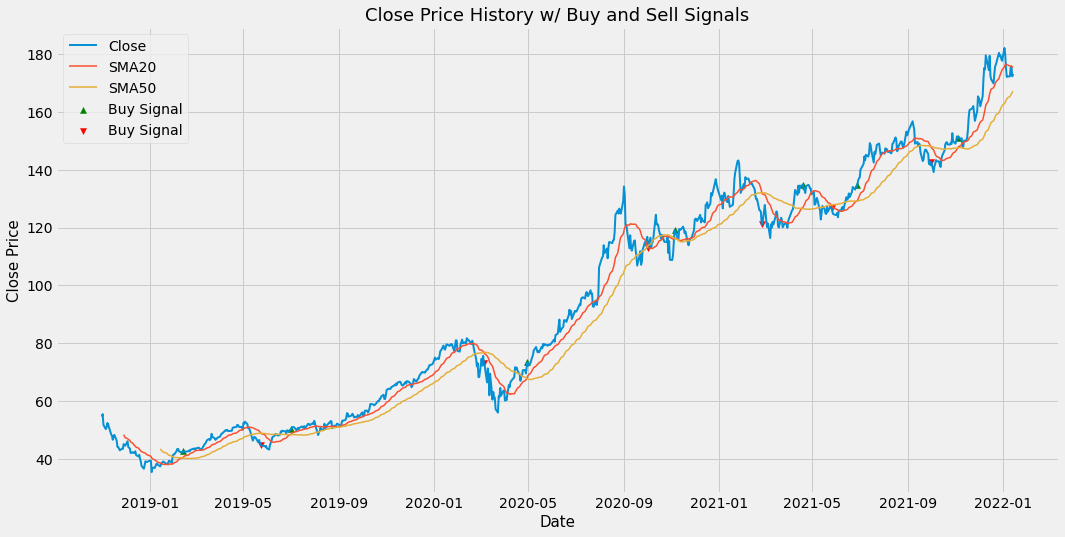

In [35]:
# Visually show the close price with SMA and buy / sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy and Sell Signals', fontsize=18)
plt.plot(df['Close'], alpha = 7, label='Close', linewidth=2)
plt.plot(df['SMA20'], alpha = 1, label='SMA20', linewidth=1.5)
plt.plot(df['SMA50'], alpha = 1, label='SMA50', linewidth=1.5)
plt.scatter(df.index, df['Buy'], alpha = 1, label='Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label='Buy Signal', marker = 'v', color = 'red')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.legend(loc='upper left')
plt.show()